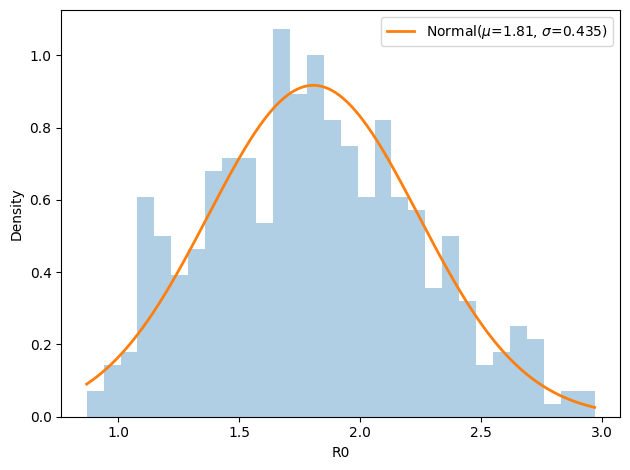

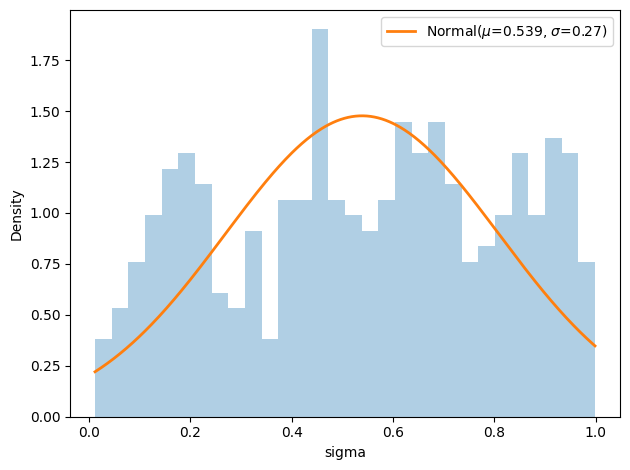

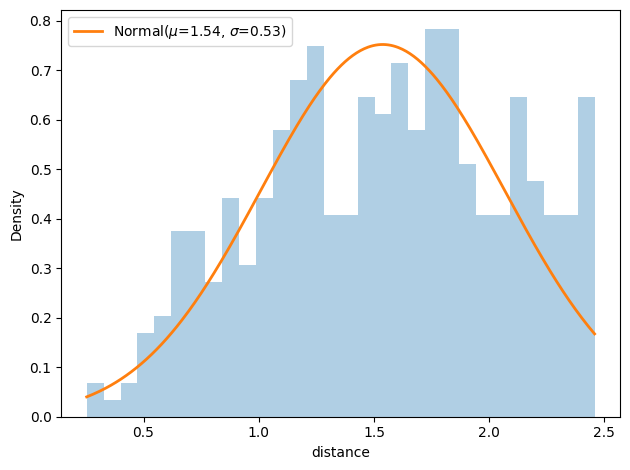

In [30]:
# R0_samps = [2.48894484, 2.48350921, 2.49743375, 2.34675394, 2.42820702, 2.0429549,
#             1.8017685,  2.31021911, 2.51960544, 2.28892963, 2.10896791, 1.54842996,
#             2.30875454, 1.82719352, 2.19695499, 2.33180913, 1.70756021, 2.55106115,
#             2.5293561,  2.44511851, 1.75954056, 1.37104905, 1.35284085, 2.21988666,
#             1.84543174, 2.69071483, 1.76639273, 1.91028971, 1.92495856, 2.61852925,
#             2.10851982, 1.88238975, 1.46303939, 2.07695646, 1.64609877, 1.81664609,
#             1.99037773, 1.6719476,  2.11699374, 2.09499364, 2.61026544, 1.71095249,
#             2.0623673,  2.39225998, 2.203365,   1.78243269, 1.85915547, 2.09745078,
#             1.98160408, 2.50910711]
# np.savetxt("./experimental_data/R0_samps1.csv", R0_samps, delimiter=",")
R0_samps = np.loadtxt("./experimental_data/R0_samps.csv", delimiter=",")
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.asarray(R0_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("R0"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

# sigma_samps =  [1.20717682, 0.98979382, 1.54173961, 1.28476096, 1.08631877, 1.19971187, 
#                 1.31696888, 1.09167371, 1.35331286, 0.84827729, 0.97045942, 0.43632072,
#                 0.73647825, 1.40562964, 1.84096102, 1.91003384, 0.87129747, 1.42381413,
#                 1.5359039,  1.66888242, 1.52703953, 0.34457525, 0.24321902, 1.8075553,
#                 0.92990901, 0.92029419, 1.12931185, 1.58028808, 0.71518228, 1.88688848,
#                 0.7595351,  1.22398593, 0.72556055, 1.91340353, 1.01239619, 0.53518741,
#                 1.19409169, 1.28904464, 1.86098105, 0.86972622, 1.44941346, 1.70181582,
#                 0.70065238, 1.80401089, 1.96441177, 0.48586471, 0.40087619, 1.94741872,
#                 0.60352936, 1.63850759]
sigma_samps = np.loadtxt("./experimental_data/sigma_samps.csv", delimiter=",")
x = np.asarray(sigma_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("sigma"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

acc_samps = np.loadtxt("./experimental_data/dists_acc.csv", delimiter=",")
x = np.asarray(acc_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("distance"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()



Chosen n_components: 1
Weights: [1.]
Means: [1.806]
Std devs: [0.435]


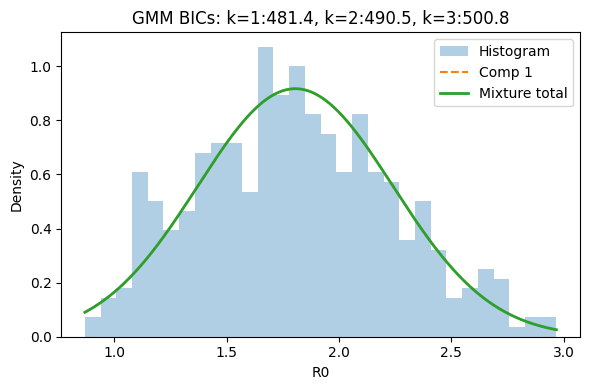

Chosen n_components: 3
Weights: [0.409 0.249 0.342]
Means: [0.515 0.177 0.831]
Std devs: [0.118 0.08  0.104]


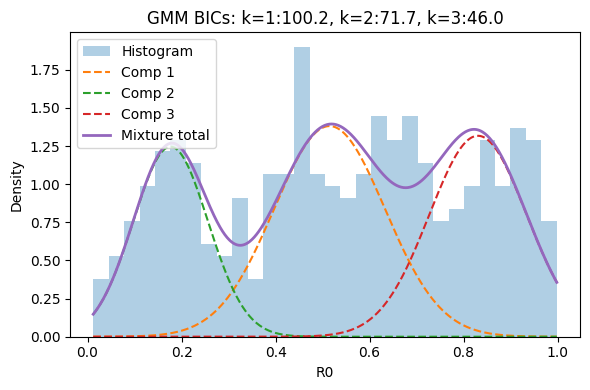

In [34]:
R0_samps = np.loadtxt("./experimental_data/R0_samps.csv", delimiter=",")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

x = np.asarray(R0_samps, dtype=float)
x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2, 3]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}, k=3:{bics[2]:.1f}")
plt.xlabel("R0"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()




sigma_samps = np.loadtxt("./experimental_data/sigma_samps.csv", delimiter=",")
x = np.asarray(sigma_samps, dtype=float)
x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2, 3]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}, k=3:{bics[2]:.1f}")
plt.xlabel("R0"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

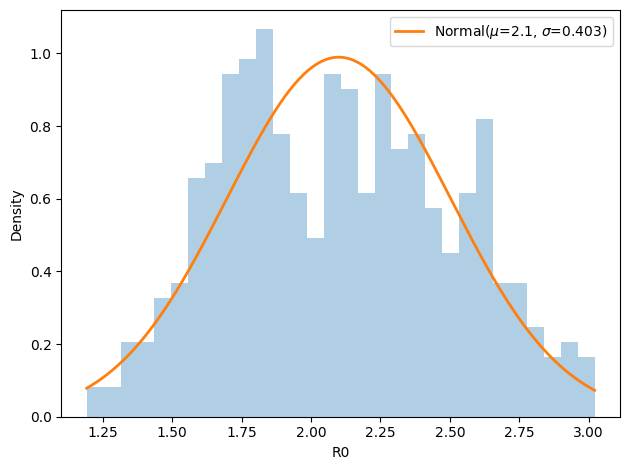

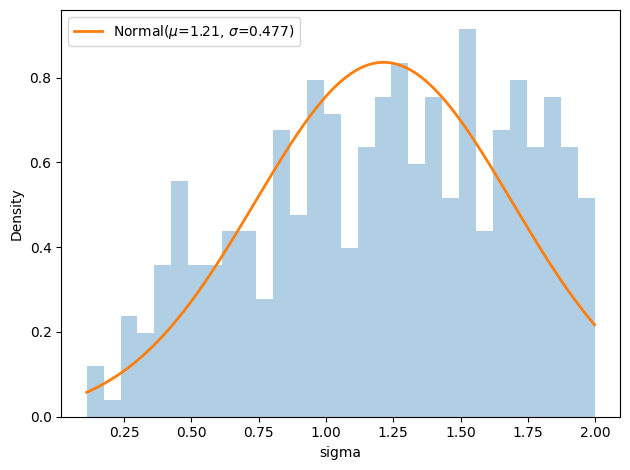

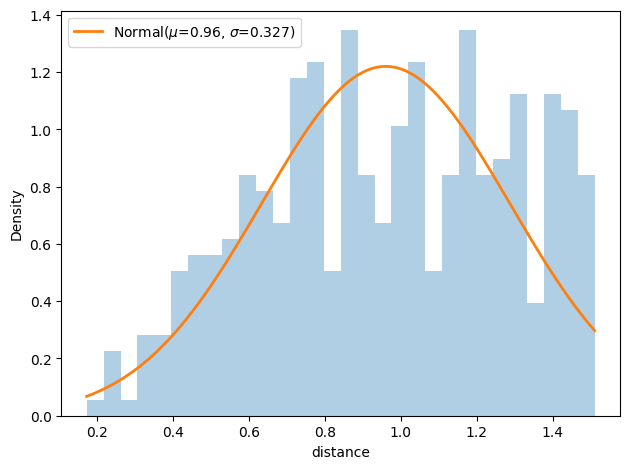

In [12]:
# eps:  1.5137721310311798
R0_samps = np.loadtxt("./experimental_data/R0_samps_v10.csv", delimiter=",")
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.asarray(R0_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("R0"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

sigma_samps = np.loadtxt("./experimental_data/sigma_samps_v10.csv", delimiter=",")
x = np.asarray(sigma_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("sigma"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

acc_samps = np.loadtxt("./experimental_data/dists_acc_v10.csv", delimiter=",")
x = np.asarray(acc_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("distance"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

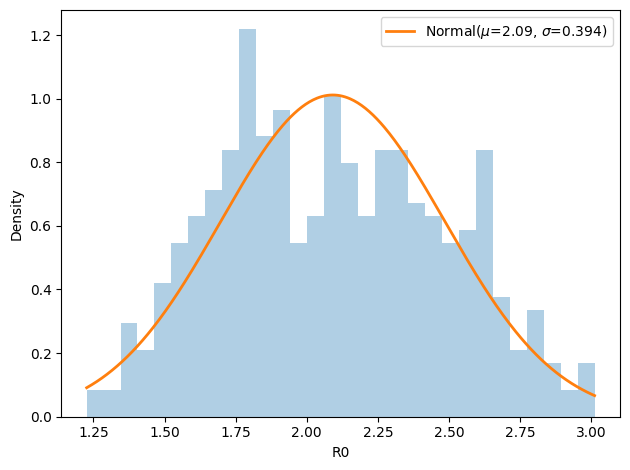

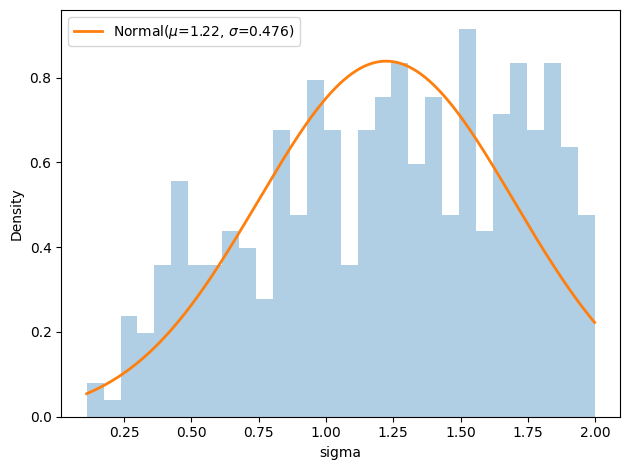

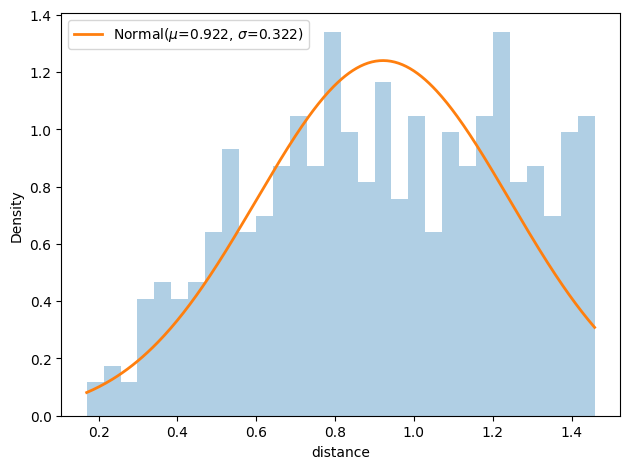

In [13]:
# summary statistics: 9 dimensions
# eps:  1.4610534043589039
R0_samps = np.loadtxt("./experimental_data/R0_samps_v09.csv", delimiter=",")
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.asarray(R0_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("R0"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

sigma_samps = np.loadtxt("./experimental_data/sigma_samps_v09.csv", delimiter=",")
x = np.asarray(sigma_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("sigma"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

acc_samps = np.loadtxt("./experimental_data/dists_acc_v09.csv", delimiter=",")
x = np.asarray(acc_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("distance"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

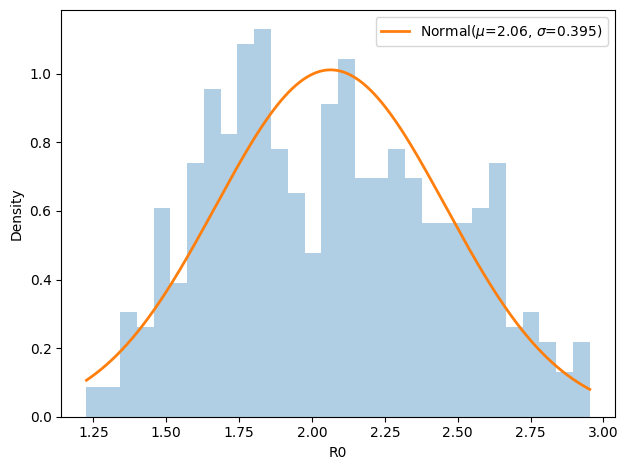

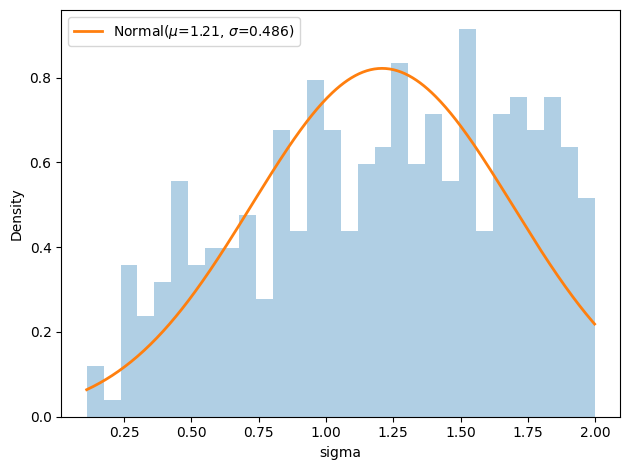

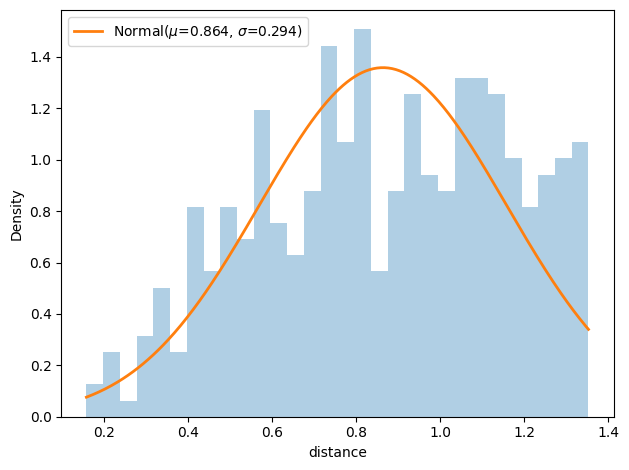

In [14]:
# summary statistics: 8 dimensions
# eps:  1.3550038302081733
R0_samps = np.loadtxt("./experimental_data/R0_samps_v08.csv", delimiter=",")
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.asarray(R0_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("R0"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

sigma_samps = np.loadtxt("./experimental_data/sigma_samps_v08.csv", delimiter=",")
x = np.asarray(sigma_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("sigma"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

acc_samps = np.loadtxt("./experimental_data/dists_acc_v08.csv", delimiter=",")
x = np.asarray(acc_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("distance"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

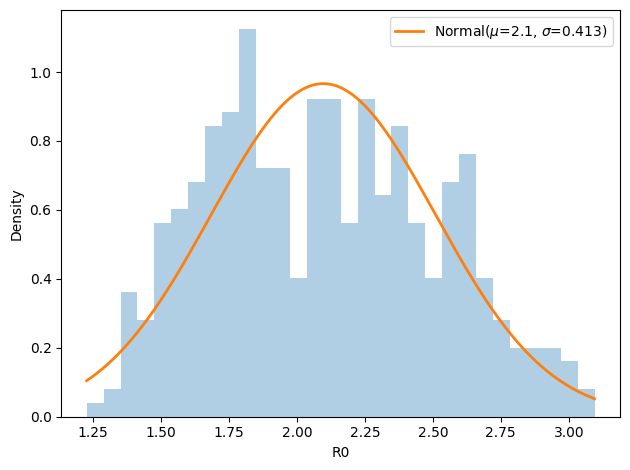

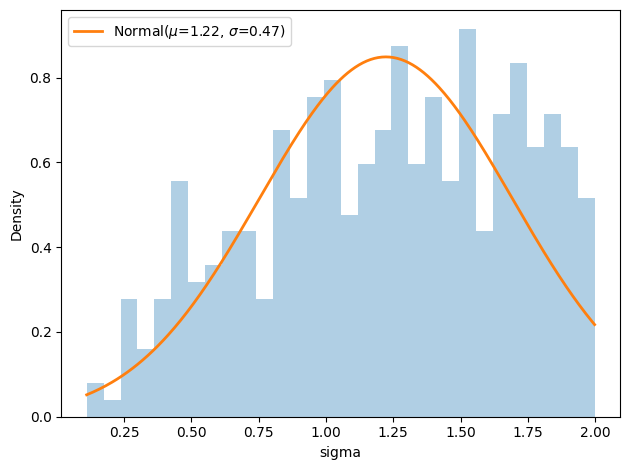

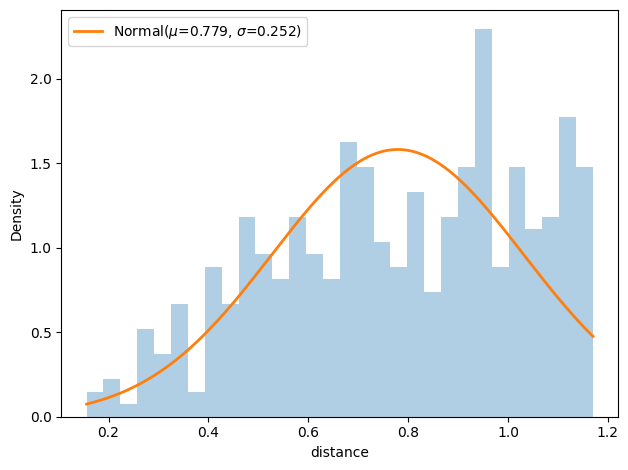

In [15]:
# summary statistics: 7 dimensions
# eps:  1.1703890001079684
R0_samps = np.loadtxt("./experimental_data/R0_samps_v07.csv", delimiter=",")
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.asarray(R0_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("R0"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

sigma_samps = np.loadtxt("./experimental_data/sigma_samps_v07.csv", delimiter=",")
x = np.asarray(sigma_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("sigma"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

acc_samps = np.loadtxt("./experimental_data/dists_acc_v07.csv", delimiter=",")
x = np.asarray(acc_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("distance"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

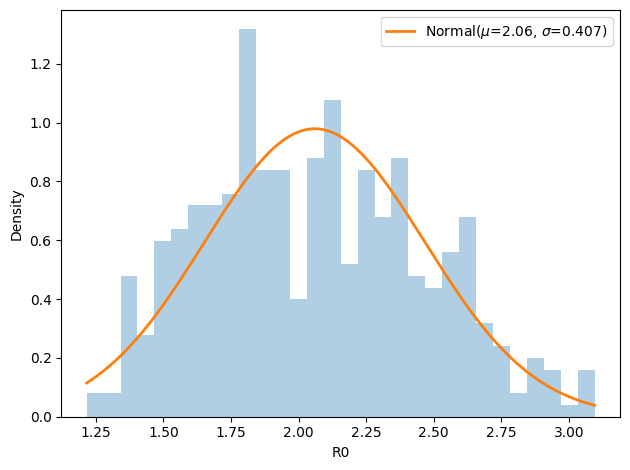

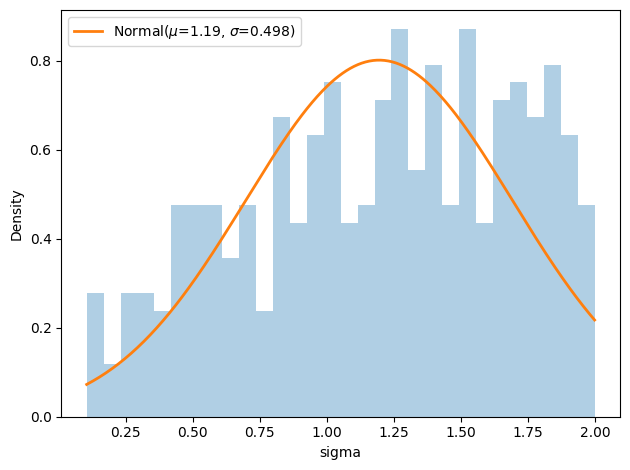

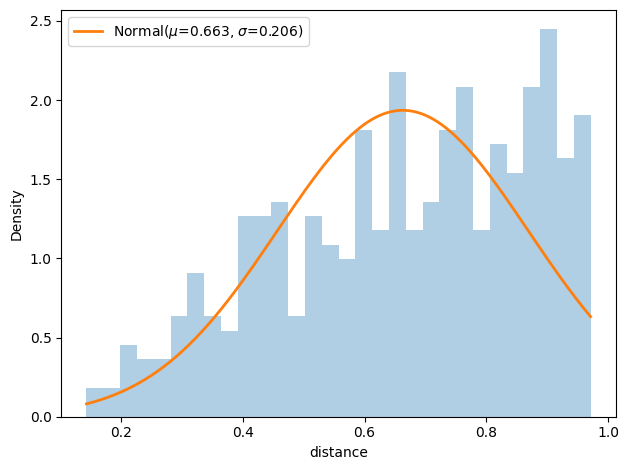

In [16]:
# summary statistics: 6 dimensions
# eps:  0.9715737430086646
R0_samps = np.loadtxt("./experimental_data/R0_samps_v06.csv", delimiter=",")
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.asarray(R0_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("R0"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

sigma_samps = np.loadtxt("./experimental_data/sigma_samps_v06.csv", delimiter=",")
x = np.asarray(sigma_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("sigma"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

acc_samps = np.loadtxt("./experimental_data/dists_acc_v06.csv", delimiter=",")
x = np.asarray(acc_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("distance"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

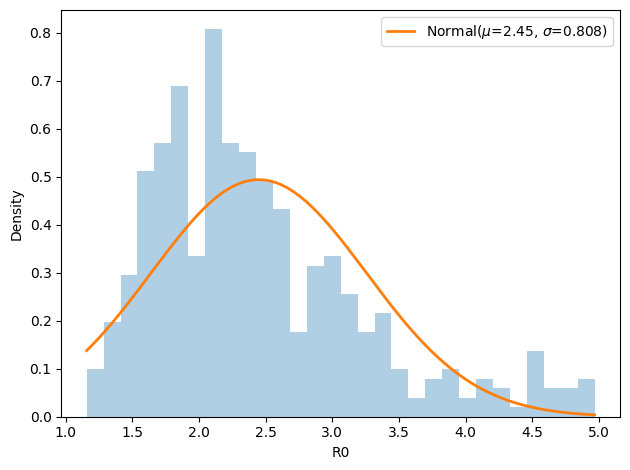

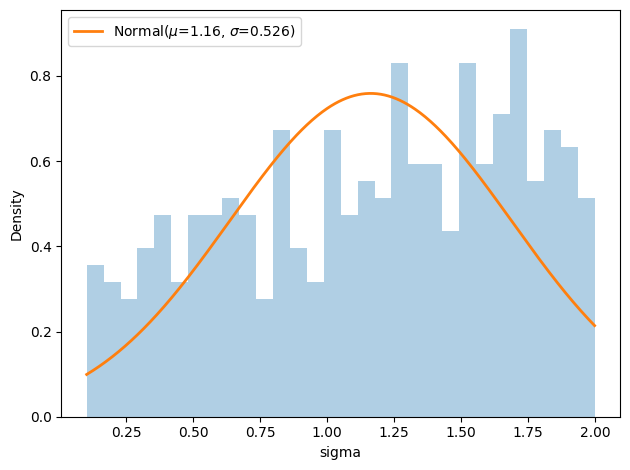

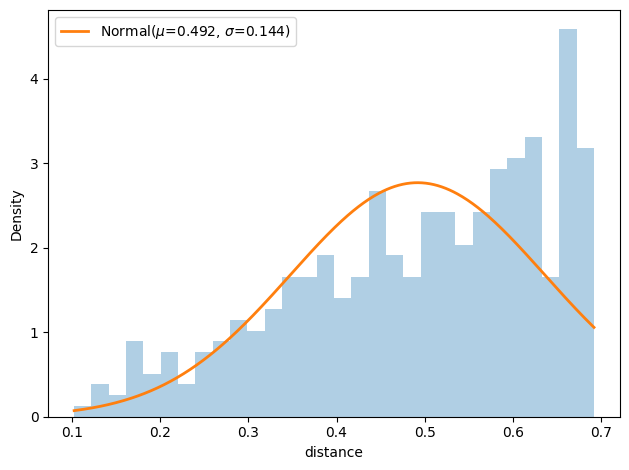

In [17]:
# summary statistics: 5 dimensions
# eps:  0.6917940320479969
R0_samps = np.loadtxt("./experimental_data/R0_samps_v05.csv", delimiter=",")
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.asarray(R0_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("R0"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

sigma_samps = np.loadtxt("./experimental_data/sigma_samps_v05.csv", delimiter=",")
x = np.asarray(sigma_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("sigma"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

acc_samps = np.loadtxt("./experimental_data/dists_acc_v05.csv", delimiter=",")
x = np.asarray(acc_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("distance"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

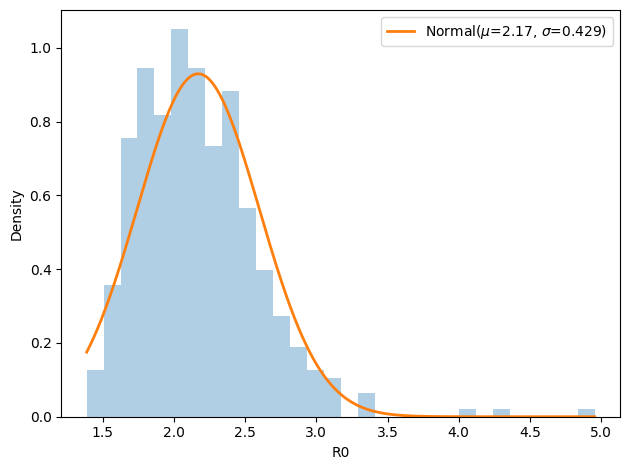

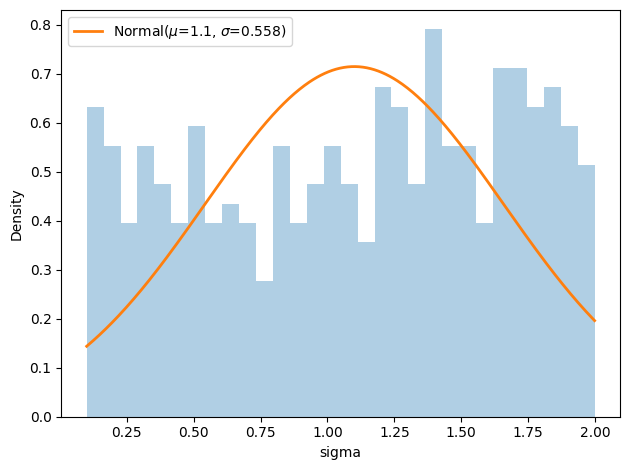

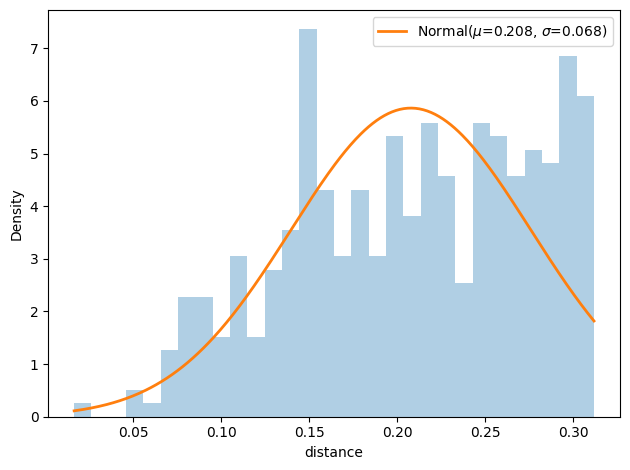

In [18]:
# summary statistics: 4 dimensions
# eps:  0.3121711551095817
R0_samps = np.loadtxt("./experimental_data/R0_samps_v04.csv", delimiter=",")
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.asarray(R0_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("R0"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

sigma_samps = np.loadtxt("./experimental_data/sigma_samps_v04.csv", delimiter=",")
x = np.asarray(sigma_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("sigma"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

acc_samps = np.loadtxt("./experimental_data/dists_acc_v04.csv", delimiter=",")
x = np.asarray(acc_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("distance"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

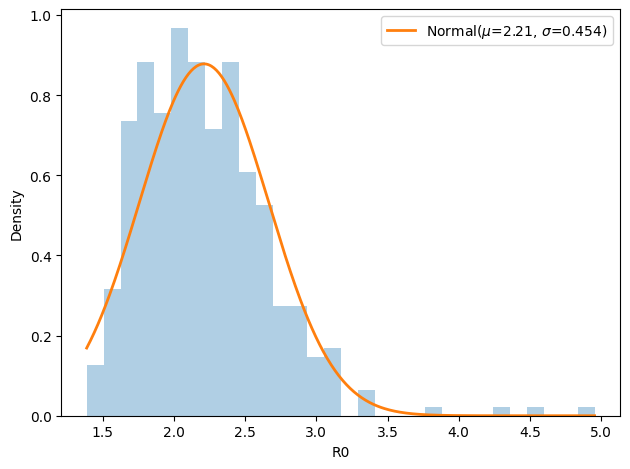

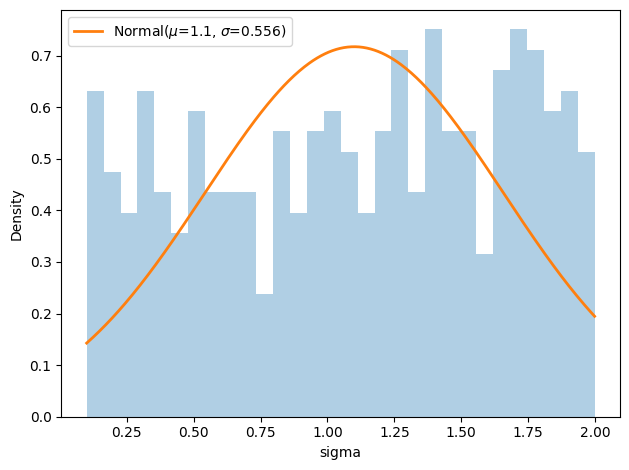

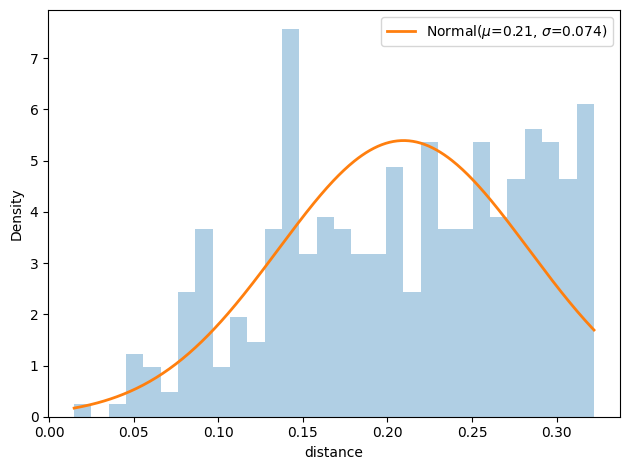

In [19]:
# summary statistics: 3 dimensions
# eps:  0.32236567049908527
R0_samps = np.loadtxt("./experimental_data/R0_samps_v03.csv", delimiter=",")
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.asarray(R0_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("R0"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

sigma_samps = np.loadtxt("./experimental_data/sigma_samps_v03.csv", delimiter=",")
x = np.asarray(sigma_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("sigma"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

acc_samps = np.loadtxt("./experimental_data/dists_acc_v03.csv", delimiter=",")
x = np.asarray(acc_samps)

# 1) Fit μ, σ by MLE
mu, sigma = norm.fit(x)   # same as np.mean(x), np.std(x, ddof=0)

# 2) Plot histogram as density
counts, edges, _ = plt.hist(x, bins=30, density=True, alpha=0.35)

# 3) Overlay the fitted PDF
xs = np.linspace(edges[0], edges[-1], 400)
pdf = norm.pdf(xs, mu, sigma)
plt.plot(xs, pdf, linewidth=2, label=fr"Normal($\mu$={mu:.3g}, $\sigma$={sigma:.3g})")

plt.xlabel("distance"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()

In [22]:
X= np.array([[1,2,3], [3,2,1]])
Y = (X > 0).astype(np.int32)
Y

array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)

In [24]:
Y.sum(axis=0)

array([2, 2, 2])

In [25]:
X.sum(axis=0)

array([4, 4, 4])

In [26]:
Z = [11.,  9.,  6., 18., 11.,
     15.,  44., 66., 63., 45., 
     35., 46., 10., 54., 58., 
     72., 79., 70., 67.,  56., 
     95., 76., 61.]
Z = np.array(Z)
Z.mean()

46.391304347826086

In [27]:
np.nanvar(Z, ddof=1)

722.1581027667984